First five rows of the dataset:
   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           13.297218          6.327112     1.347214  ...                 0   
1            4.542524          7.619885     0.518767  ...                 0   
2           19.555085          7.844988     1.826335  ...                 0   
3           12.209266          8.428001     7.435604  ...                 0   
4           18.454356          6.310461     0.795498  ...                 0   

   BehavioralProblems       ADL  Con

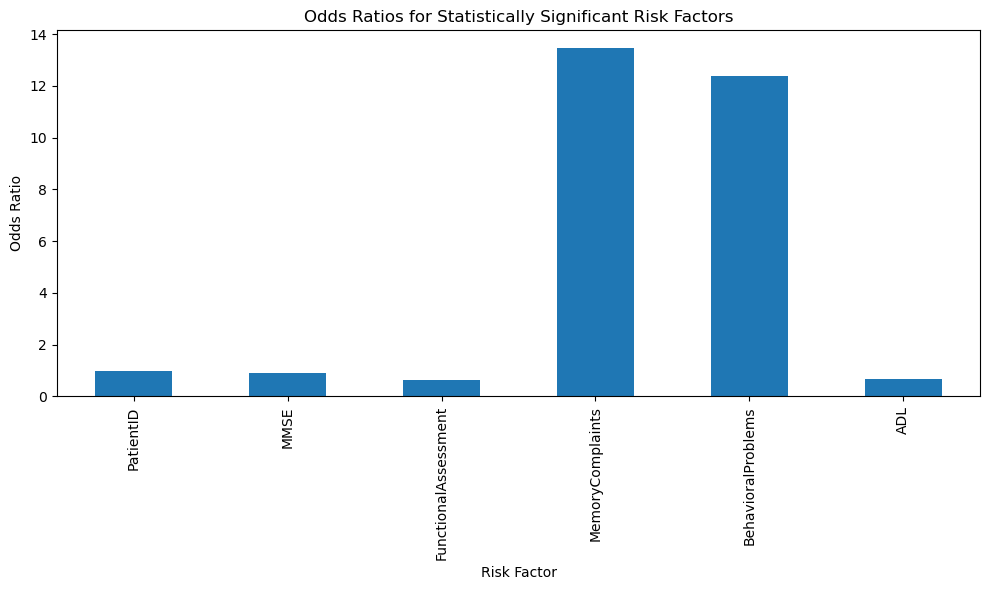

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("alzheimers.csv")

print("First five rows of the dataset:")
print(df.head())
print("\nColumns in the dataset:")
print(df.columns)
# Data Preparation
# Here, we assume that the dataset contains a binary outcome column named 'Diagnosis'
# indicating Alzheimer’s presence (e.g., 0 = no Alzheimer’s, 1 = Alzheimer’s).
target = 'Diagnosis'

if target not in df.columns:
    raise ValueError(f"Column '{target}' not found. Please update the target variable name.")

# Separate outcome (y) from predictors (X)
y = df[target]
X = df.drop(columns=[target])

# Convert categorical variables to dummy/indicator variables.
# This will automatically handle non-numeric risk factors.
X = pd.get_dummies(X, drop_first=True)

# Add a constant term to the predictors (required for statsmodels)
X = sm.add_constant(X)

# Logistic Regression Model
# Fit a logistic regression model using statsmodels.
# This model will estimate the association between each predictor and the outcome.
model = sm.Logit(y, X).fit()
print("\nLogistic Regression Model Summary:")
print(model.summary())

# Identify and Quantify Significant Risk Factors
# Extract the coefficients, p-values, and compute the odds ratios
summary_df = pd.DataFrame({
    'Coefficient': model.params,
    'p-value': model.pvalues,
    'Odds Ratio': np.exp(model.params)
})

# Identify significant factors (p-value < 0.05) and exclude the constant term
significant = summary_df[(summary_df['p-value'] < 0.05) & (summary_df.index != 'const')]
print("\nSignificant risk factors (p < 0.05):")
print(significant.sort_values(by='Odds Ratio', key=abs, ascending=False))

# Visualize the Odds Ratios for significant factors
plt.figure(figsize=(10, 6))
significant['Odds Ratio'].plot(kind='bar')
plt.title("Odds Ratios for Statistically Significant Risk Factors")
plt.ylabel("Odds Ratio")
plt.xlabel("Risk Factor")
plt.tight_layout()
plt.show()
